In [0]:
# 아래 코드를 기반으로 자유롭게 수정.
# reward_matrix 형태 수정 금지.
# 강화학습 관련 패키지, 라이브러리, 함수 사용 금지 (예. OpenAI Gym)

import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# 정책 파라미터 theta_0을 무작위 행동 정책 pi로 변환하는 함수
def simple_convert_into_pi_from_theta(theta):
    '''단순 비율 계산'''
    [m, n] = theta.shape  # theta의 행렬 크기를 구함
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])  # 비율 계산

    pi = np.nan_to_num(pi)  # nan을 0으로 변환
    return pi

In [0]:
# ε-greedy 알고리즘 구현

class adSelector():
    def __init__(self, reward_matrix, values):
        self.N = reward_matrix.shape[0]
        self.T = reward_matrix.shape[1]
        self.num_sims = reward_matrix.shape[2]
        return

    # 아래 함수를 수정. 필요한 경우 input 인자 등을 추가.
    def select_ad(self, state, Q, epsilon, pi_0):
        direction = np.arange(N)
        # 행동을 결정
        if np.random.rand() < epsilon: # 확률 e로 무작위 행동을 선택함
            action = np.random.choice(direction, p=pi_0[state, :])
        else:
            action = direction[np.nanargmax(Q[state, :])]
        return action
    
    def get_s_next(self, state, action): # next state 을 반환하는 함수
        direction = np.arange(N)
        next_direction = direction[action]  # 행동 a의 방향
        s_next = next_direction
        
        return s_next

In [0]:
# Q러닝 알고리즘으로 행동가치 함수 Q를 수정
def Q_learning(state, action, s_next, reward, Q, eta, gamma=0.01):
    
    if reward is 1: #목표 지점(현재의 보상이 1일때)
        Q[state, action] = Q[state, action] + eta * (reward - Q[state, action])
    else:
        Q[state, action] = Q[state, action] + eta * (reward + gamma*np.nanmax(Q[s_next,:]) - Q[state, action])
    return Q

In [0]:
def test_algorithm(algo, reward_matrix, epsilon, eta):
    N = reward_matrix.shape[0]
    T = reward_matrix.shape[1]
    num_sims = reward_matrix.shape[2]
    cumulative_rewards = np.zeros((num_sims,T))
    statelist = np.arange(N) # 초기상태 리스트
    
    for sim in range(num_sims):
        #print("person:", sim)
        theta_0 = np.ones((N,N))
        pi_0 = simple_convert_into_pi_from_theta(theta_0)
        [a, b] = theta_0.shape  # 열과 행의 갯수를 변수 a, b에 저장
        Q = np.random.rand(a, b) * theta_0 * 0.1
        
        Reward_array = []
        state = statelist[0] # 초기상태 지정
        
        for t in range(T):
            epsilon = epsilon * 0.99 # epsilon 점차적으로 감소
            chosen_ad = algo.select_ad(state, Q, epsilon, pi_0) #액션
            reward = reward_matrix[chosen_ad,t,sim] # 현재 보상 스칼라
            Reward_array.append(reward)
            s_next = algo.get_s_next(state, chosen_ad) # 다음 상태 정보
            Q = Q_learning(state, chosen_ad, s_next, Reward_array[t], Q, eta) # Q러닝 현재 보상 사용
            state = s_next # 상태 업데이트
            
            if t == 0:
                cumulative_rewards[sim,t] = reward
            else:
                cumulative_rewards[sim,t] = cumulative_rewards[sim,t-1] + reward

    return cumulative_rewards

[7817. 7635. 7419. 7794. 7638. 7912. 7581. 7372. 7528. 7488. 7543. 7523.
 7469. 7719. 7455. 7585. 7461. 7592. 7670. 7522. 7605. 7510. 7682. 7677.
 7485. 7516. 7316. 7572. 7666. 7649.]


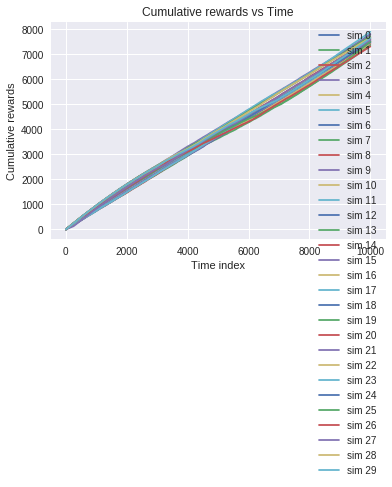

In [0]:
# 훈련집합 (Training set) 생성. 이 부분은 테스트집합으로 변경하여 테스트할 것임.  
N = 3
T = 10000
num_sims = 30
epsilon = 0.5 # we need this - 무작위 행동 선택 확률
eta = 0.5 # we need this - learning rate

reward_matrix = np.zeros((N,T,num_sims)) # 초기 보상 텐서
random.seed(0)
for sim in range(num_sims):
    shuffled_index = np.random.permutation(N)
    reward_matrix[shuffled_index[0],:,sim] = [np.random.binomial(1, p=i/T) for i in range(T)]
    reward_matrix[shuffled_index[1],:,sim] = [np.random.binomial(1, p=1-i/T) for i in range(T)]
    reward_matrix[shuffled_index[2],:,sim] = [np.random.binomial(1, p=3/4) for i in range(T)]


# 학습 알고리즘 테스트.
algo = adSelector(reward_matrix,[])
results = test_algorithm(algo, reward_matrix, epsilon, eta) # we need epsilon and eta
print(results[:,T-1])


# 학습 결과를 그래프로 출력.
for i in range(num_sims):
    plt.plot(range(1,T+1), results[i,:], label="sim {}".format(i))

plt.plot()
plt.xlabel("Time index")
plt.ylabel("Cumulative rewards")
plt.title("Cumulative rewards vs Time")
plt.legend()
plt.show()

[5852. 5745. 5819. 5812. 5746. 5804. 5828. 5882. 5753. 5847. 5834. 5787.
 5815. 6000. 5734. 5809. 5775. 5839. 5844. 5756. 5919. 5819. 5813. 5891.
 5826. 5880. 5785. 5830. 5851. 5729.]


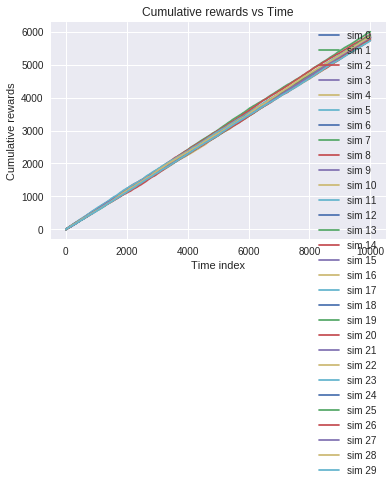

In [0]:
# 아래 코드를 기반으로 자유롭게 수정.

# reward_matrix 형태 수정 금지.

# 강화학습 관련 패키지, 라이브러리, 함수 사용 금지 (예. OpenAI Gym)

import numpy as np

import random

import matplotlib.pyplot as plt



class adSelector():

  def __init__(self, reward_matrix, values):

    self.N = reward_matrix.shape[0]

    self.T = reward_matrix.shape[1]

    self.num_sims = reward_matrix.shape[2]

    return



  # 아래 함수를 수정. 필요한 경우 input 인자 등을 추가.

  def select_ad(self):

    return random.randrange(N)    



def test_algorithm(algo, reward_matrix):

  N = reward_matrix.shape[0]

  T = reward_matrix.shape[1]

  num_sims = reward_matrix.shape[2]

  cumulative_rewards = np.zeros((num_sims,T))



  for sim in range(num_sims):

    for t in range(T):

      chosen_ad = algo.select_ad()

      reward = reward_matrix[chosen_ad,t,sim]



      if t == 0:

        cumulative_rewards[sim,t] = reward

      else:

        cumulative_rewards[sim,t] = cumulative_rewards[sim,t-1] + reward



  #print(cumulative_rewards)

  return cumulative_rewards



# 훈련집합 (Training set) 생성. 이 부분은 테스트집합으로 변경하여 테스트할 것임.  

N = 3

T = 10000

num_sims = 30

reward_matrix = np.zeros((N,T,num_sims))

random.seed(0)

for sim in range(num_sims):

  shuffled_index = np.random.permutation(N)

  reward_matrix[shuffled_index[0],:,sim] = [np.random.binomial(1, p=i/T) for i in range(T)]

  reward_matrix[shuffled_index[1],:,sim] = [np.random.binomial(1, p=1-i/T) for i in range(T)]

  reward_matrix[shuffled_index[2],:,sim] = [np.random.binomial(1, p=3/4) for i in range(T)]



# 학습 알고리즘 테스트.

algo = adSelector(reward_matrix,[])

results = test_algorithm(algo, reward_matrix)

print(results[:,T-1])



#print(results)



# 학습 결과를 그래프로 출력.

for i in range(num_sims):

  plt.plot(range(1,T+1), results[i,:], label="sim {}".format(i))

plt.plot()



plt.xlabel("Time index")

plt.ylabel("Cumulative rewards")

plt.title("Cumulative rewards vs Time")

plt.legend()

plt.show()